In [2]:
#binaries
import splat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import popsims
import wisps
%matplotlib inline

/users/caganze/research/splat


Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
binr=pd.read_hdf('/volumes/LaCie/popsimsdata/spectral_templates_data_version_may8.h5',  key='binaries')

In [3]:
singles=pd.read_hdf('/volumes/LaCie/popsimsdata/spectral_templates_data_version_may8.h5',  key='singles')

In [184]:
wave_grid= pd.read_hdf('/volumes/LaCie/popsimsdata/spectral_templates_data_version_may8.h5', key='wavegrid')
wave_mask= np.logical_and(wave_grid >=0.8, wave_grid <2.4)

In [3]:
binr=pd.read_hdf('/volumes/LaCie/popsimsdata/spectral_templates_data_version_jul26.h5',  key='singles')

<AxesSubplot:ylabel='Frequency'>

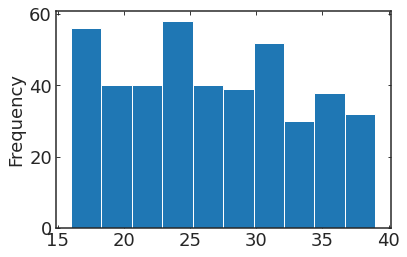

In [214]:
binr.spex_type[~binr['system_interpolated_flux'].apply(np.nanmedian).isna()].apply(lambda x: splat.typeToNum(x)).plot(kind='hist')

In [216]:
import scipy.interpolate as interp
def interpolate_flux_wave(wave, flux):
    #function to interpolate 
    f= interp.interp1d(wave, flux, assume_sorted = False, fill_value = np.nan)
    return f(wave_grid)

In [217]:
std=splat.getStandard('L5.0')

In [4]:
for idx in range(len(binr)):
    print (len(binr.wavegrid.values[0]))

409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409
409


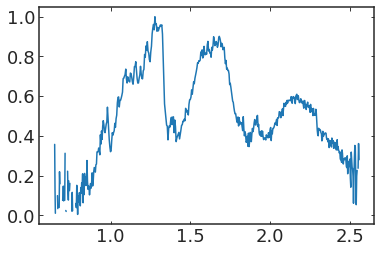

In [220]:
fig, ax=plt.subplots()

ax.plot(std.wave.value, std.flux.value)

In [195]:
#W[0]

In [221]:
W=W[np.logical_and(W >0.8, W<2.4)]

In [222]:
interpolate_flux_wave(std.wave.value, std.flux.value)

array([0.23219755, 0.22016271, 0.24560331, 0.25685502, 0.30471674,
       0.31901694, 0.31984953, 0.33426045, 0.32810342, 0.30924757,
       0.38178358, 0.36942047, 0.40908178, 0.39183892, 0.4330273 ,
       0.46991827, 0.46083921, 0.43121552, 0.41785376, 0.43177393,
       0.45430382, 0.46776571, 0.5270711 , 0.50187103, 0.44252435,
       0.39086096, 0.35269032, 0.32583441, 0.32382375, 0.3643288 ,
       0.40674592, 0.40637162, 0.41345585, 0.42348033, 0.4543983 ,
       0.44770404, 0.47631678, 0.50016013, 0.55206983, 0.5874816 ,
       0.59571309, 0.55737581, 0.57085356, 0.57901057, 0.58746946,
       0.60048777, 0.6163551 , 0.67260468, 0.68992516, 0.69825848,
       0.70693636, 0.72986619, 0.69821242, 0.67098838, 0.69007597,
       0.68275497, 0.67546413, 0.67231106, 0.70577903, 0.71383229,
       0.69942545, 0.67727639, 0.6628757 , 0.68803834, 0.73635384,
       0.74886838, 0.76774375, 0.74172919, 0.69901311, 0.67127004,
       0.66620541, 0.68501284, 0.70272125, 0.74007058, 0.72187

In [223]:
len(binr['difference_spectrum'][0])

409

In [5]:
len(binr['system_interpolated_flux'][0])

409

In [7]:
binr['system_interpolated_noise'].apply(np.nanmedian).dropna()

0      1.079311e-12
1      4.026929e-12
4      3.702320e-12
5      2.837803e-12
7      2.949054e-12
           ...     
431    1.173430e-14
432    6.359185e-15
433    3.291235e-14
434    1.705325e-14
435    4.092500e-15
Name: system_interpolated_noise, Length: 425, dtype: float64

In [29]:
tpls=fil_spectra= pd.read_pickle('/volumes/LaCie/popsimsdata/spectral_templates_data.pkl')

In [115]:
boolean=np.vstack(tpls.spectral_type.values)[:,0]<40
tpls[boolean][['spectra', 'spectral_type']].to_hdf('/volumes/LaCie/popsimsdata/spectral_templates_only.h5')

TypeError: to_hdf() missing 1 required positional argument: 'key'

In [50]:
tpls

,spectral_type,spectra,flux,wave,noise,object_name
0,"(16.0, 0.5)",SPEX-PRISM spectrum of 2MASS J16002535-2644060,"[0.14796930171868541, 0.2202800894453492, 0.18...","[0.644767, 0.647017, 0.649254, 0.651478, 0.653...","[0.031097099998505927, 0.030408729387976677, 0...",2MASS J16002535-2644060
1,"(12.0, 1.118033988749895)",SPEX-PRISM spectrum of 2MASS J17252029-0024508,"[0.2026488, 0.21176024, 0.14136912, 0.1744545,...","[0.65343547, 0.6556386, 0.657832, 0.6600167, 0...","[0.21779345, 0.1631624, 0.15613359, 0.14236833...",2MASS J17252029-0024508
2,"(15.0, 0.5)",SPEX-PRISM spectrum of 2MASS J01532750+3631482,"[0.262997, 0.083194256, 0.0018768199, 0.188846...","[0.659306, 0.661485, 0.663657, 0.665823, 0.667...","[0.13565567, 0.04431213, 0.108164705, 0.046629...",2MASS J01532750+3631482
3,"(17.0, 0.5)",SPEX-PRISM spectrum of WISE J141143.25-452418.3,"[0.047006174738617144, 0.029903828404462842, 0...","[0.672901, 0.674304, 0.675708, 0.677112, 0.678...","[0.05976125896151972, 0.0279308389362753, 0.04...",WISE J141143.25-452418.3
4,"(13.0, 1.118033988749895)",SPEX-PRISM spectrum of 2MASS J19445221-0831036,"[0.72692084, 0.796214, 0.33524805, 0.20888495,...","[0.6577501, 0.6599351, 0.6621123, 0.6642827, 0...","[0.18675224, 0.1783706, 0.15675668, 0.1564382,...",2MASS J19445221-0831036
...,...,...,...,...,...,...
468,"(40.0, 0.5)",anon spectrum,"[0.14480140842713898, 0.2555566094667533, 0.02...","[0.9023, 0.9047, 0.9071, 0.9095, 0.9119, 0.914...","[0.15423606893882216, 0.15598094075150798, 0.1...",None
469,"(40.0, 0.5)",anon spectrum,"[-0.028605073417404, 0.09193320009847321, 0.03...","[0.9023, 0.9047, 0.9071, 0.9095, 0.9119, 0.914...","[0.12778993281270976, 0.12643779758855123, 0.1...",None
470,"(40.0, 1.118033988749895)",anon spectrum,"[0.20499606497574113, -0.01917406382090707, 0....","[1.103, 1.10765, 1.1123, 1.11695, 1.1216, 1.12...","[0.1392494346119377, 0.1363349932262262, 0.114...",None
471,"(38.0, 0.5)",anon spectrum,"[0.0060223574250434534, 0.19378953958115452, 0...","[0.9023, 0.9047, 0.9071, 0.9095, 0.9119, 0.914...","[0.08988898421660137, 0.09326306490293641, 0.0...",None


In [7]:
bhjk

NameError: name 'bhjk' is not defined

In [ ]:
def is_na(flux):
    return np.isnan(flux).all()

def apply_wave_mask(flux):
    try:
        flux=np.array(flux)
        flx= flux[wave_mask.values.flatten()]
        cols= ['flux_{}'.format(idx) for idx in range(len(flx))]
        return pd.Series(dict(zip(cols, flx)))
    except:
        return pd.Series({})

    

In [ ]:
# binr.difference_spectrum

In [ ]:
binar_new= binr.system_interpolated_flux.apply(apply_wave_mask)
binar_new['primary_type']= binr.primary_type
binar_new['secondary_type']= binr.secondary_type
binar_new['system_type']= binr.system_type
binar_new['object_name']= ['binary{}'.format(x) for x in range(len(binr))]
binar_new=binar_new.replace([np.inf, -np.inf], np.nan)


In [ ]:
#noise
binar_noise= binr.system_interpolated_noise.apply(apply_wave_mask)
binar_noise['object_name']= ['binary{}'.format(x) for x in range(len(binr))]
binar_noise=binar_noise.replace([np.inf, -np.inf], np.nan)


In [ ]:
binar_diff= binr.difference_spectrum.apply(apply_wave_mask)
binar_diff['object_name']= ['binary{}'.format(x) for x in range(len(binr))]
binar_diff['object_name']= ['binary{}'.format(x) for x in range(len(binr))]

In [ ]:
binar_noise=binar_noise.replace([np.inf, -np.inf], np.nan)
binar_diff=binar_diff.replace([np.inf, -np.inf], np.nan)

In [ ]:
flux_columns=[ 'flux_{}'.format(idx) for idx in range(441)]
binar_diff[flux_columns]=binar_diff[flux_columns].apply(lambda x: np.abs(x))

In [ ]:
def check_nan(x):
    try:
        return np.isnan(x[flux_columns]).any()
    except:
        return True
    

In [ ]:
nan_mask_diff= binar_diff.apply(check_nan, axis=1)
nan_mask_noise= binar_noise.apply(check_nan, axis=1)
nan_mask_flux= binar_new.apply(check_nan, axis=1)


In [ ]:
nans_binaries=np.logical_or.reduce([nan_mask_flux,nan_mask_noise, nan_mask_diff] )

In [ ]:
nans_binaries

In [ ]:
#binar_diff.loc[nans_binaries]

In [ ]:
#jhk

In [ ]:
singles

In [ ]:
singles_new= singles['system_interpolated_flux'].apply(apply_wave_mask)
singles_new['spectral_type']=singles['spectral_type']
singles_new['object_name']= singles['name']
singles_new['spex_type']= singles['spex_type']
singles_new['opt_type']= singles['opt_type']
singles_new['obs_date']= singles['obs_date']

In [ ]:
#noise
singles_noise= singles['system_interpolated_noise'].apply(apply_wave_mask)
singles_noise['spectral_type']=singles['spectral_type']
singles_noise['object_name']= singles['name']
singles_noise['spex_type']= singles['spex_type']
singles_noise['opt_type']= singles['opt_type']
singles_noise['obs_date']= singles['obs_date']

In [ ]:
#difference
singles_diff= singles['difference_spectrum'].apply(apply_wave_mask)
singles_diff['spectral_type']=singles['spectral_type']
singles_diff['object_name']= singles['name']
singles_diff['spex_type']= singles['spex_type']
singles_diff['opt_type']= singles['opt_type']
singles_diff['obs_date']= singles['obs_date']

In [ ]:
for g in singles_new[flux_columns].values:
    plt.plot(np.log10(g), color='b', alpha=0.1)

In [ ]:
singles_noise.dropna().spectral_type.apply(splat.typeToNum).plot(kind='hist')

In [ ]:
singles_noise.spectral_type

In [ ]:
#FILENAME='/volumes/LaCie/popsimsdata/spectral_templates_data_version_july15.h5'
#binar_new.dropna().to_hdf(FILENAME, key='binaries_flux')
#binar_noise.dropna().to_hdf(FILENAME,key='binaries_noise')
#binar_diff.dropna().to_hdf(FILENAME,key='binaries_difference_spectrum')
#wave_grid.to_hdf( FILENAME, key='wave_grid')
#

In [ ]:
FILENAME='/volumes/LaCie/popsimsdata/single_templates_flux_calibrated_version_july22.h5'
singles_new.to_hdf(FILENAME, key='singles_flux')
singles_noise.to_hdf(FILENAME,key='singles_noise')
singles_diff.to_hdf(FILENAME,key='singles_difference_spectrum')

In [ ]:
singles_diff

In [ ]:
hjk

In [ ]:
tcollision=900
dt= 1
NSTARS=5000
int(1.5*NSTARS/((tcollision/(dt))))

In [ ]:
8*(900)

In [ ]:
hj

In [ ]:
binr=binr.dropna()

In [ ]:
binr.head(5)

In [ ]:
primary_spts=binr.primary_type.apply(lambda x:wisps.make_spt_number(x[0])).values
sec_spts=binr.secondary_type.apply(lambda x: wisps.make_spt_number(x[0])).values
system_spts=binr.system_type.apply(lambda x: wisps.make_spt_number(x[0])).values

In [ ]:
def compute_median_system_type(prim, sec):
    system=(np.nan, np.nan)
    if prim <= 16:
        system= (prim, 0.0)
    if prim >= 16:
        boolean=np.logical_and(primary_spts == prim, sec_spts==sec)
        system= (np.nanmedian(system_spts[boolean]), np.nanstd(system_spts[boolean]))
    return system

In [ ]:
from itertools import combinations
grid= np.arange(10, 43)
combs= np.vstack([(x,y) for x, y in  combinations(grid, 2)])

df=pd.DataFrame()
df['prim']=combs[:,0]
df['sec']=combs[:,1]
df['sys']=np.nan
df['sys_unc']=np.nan

In [ ]:
spgrid=np.arange(10, 43)
for idx, row in df.iterrows():
    vals=compute_median_system_type(row.prim, row.sec)
    df.loc[idx, 'sys']=vals[0]
    df.loc[idx,'sys_unc']=vals[1]

In [ ]:
df.dropna()

In [ ]:
df.dropna().to_csv('../data/binary_lookup_table_spex_small.csv')

In [ ]:
import splat

In [ ]:
splat.initializeStandards()

In [ ]:
s=splat.STDS_DWARF_SPEX['M9.0']
#s2=splat.getSpectrum(lucky=True)[0]
s2=splat.Spectrum(wave=[], flux=[], noise=[])

In [ ]:
sfake= splat.Spectrum(wave=np.linspace(1.0, 2.0, 1000),
                     flux= np.ones(1000))
sfake.plot()

In [ ]:
chisq, scl=splat.compareSpectra(s, sfake, plot=True)

In [ ]:
(s-sfake).wave

In [ ]:
chisq, scl=splat.compareSpectra(s, s2, plot=True)
s2.scale(scl)

In [ ]:
sdiff=(s-s2)

In [ ]:
sdiff.normalize([1.2, 1.3])